In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign"

In [3]:
df_phish = pd.read_csv("result_v2_long2.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_v2_benign.txt", sep="\t")
df_benign["is_phish"] = 0

#df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_60167/2199128929.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_60167/2199128929.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (17456, 7)
Legit sites: (13465, 7)
Dataframe sites: (30921, 7)


In [4]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [5]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,10045,3420,13465
1,9396,8060,17456
All,19441,11480,30921


In [6]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,10045,3420,13465
1,15183,2273,17456
All,25228,5693,30921


In [7]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.7020905923344948, Precision brand: 0.39926225188828385
Sensitivity: 0.46173235563703025, Sensitivity brand: 0.13021310724106325


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(9396, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Netflix+211/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Scotiabank+326/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/PostFinance+430/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/AOL+143/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Apple+234/shot.png']

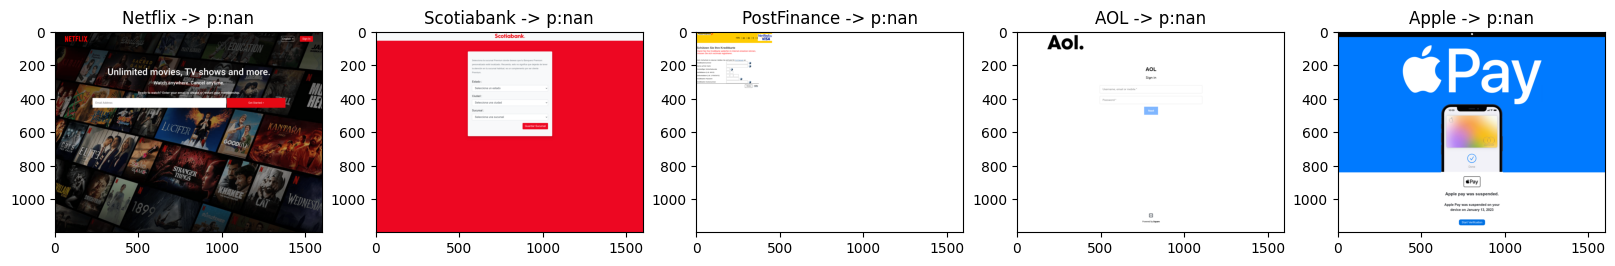

In [18]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(3420, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/waws-prod-bn1-011a.cloudapp.net/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/istream2watch.stream/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/group.intesasanpaolo.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/pod-000-1117-19.backblaze.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_benign/getconverter.org/shot.png']

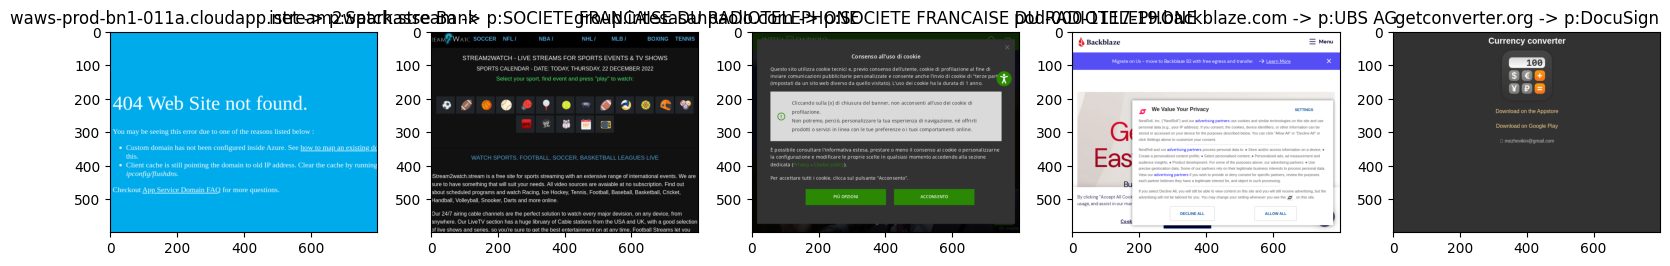

In [12]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(5787, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/IRS+41/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Dropbox+41/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/Adobe+216/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/AOL+443/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/own_dataset_phish_long2/American Express+262/shot.png']

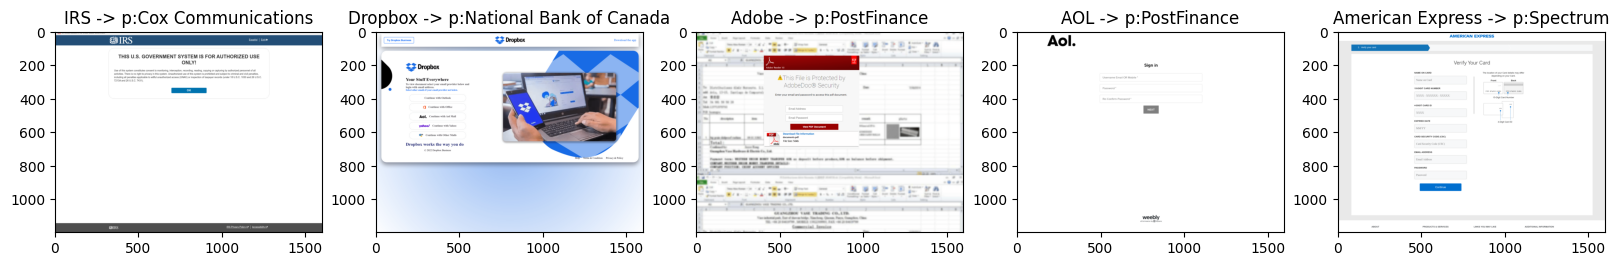

In [14]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "own_dataset_phish_long2/American Express+215/shot.png",
    "own_dataset_phish_long2/GoDaddy+142/shot.png",
    "own_dataset_phish_long2/Societe Generale+130/shot.png",
    "own_dataset_phish_long2/DocuSign+453/shot.png",
    "own_dataset_phish_long2/Deutsche Telekom+387/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+293/shot.png",
    "own_dataset_phish_long2/Blockchain+353/shot.png",
    "own_dataset_phish_long2/American Express+120/shot.png"
]

examples_fp = [
    "own_dataset_benign/rr1---sn-i5heen7r.gvt1.com/shot.png",
    "own_dataset_benign/uncg.edu/shot.png",
    "own_dataset_benign/cognito-identity.ca-central-1.amazonaws.com/shot.png",
    "own_dataset_benign/rr1---sn-pmcg-bg0s.googlevideo.com/shot.png",
    "own_dataset_benign/delta206.rtb.appier.net/shot.png",
    "own_dataset_benign/ideal.bunq.com/shot.png",
    "own_dataset_benign/fm.tuba.pl/shot.png",
    "own_dataset_benign/www.metrotransit.org/shot.png"
]

examples_false_brand = [
    "own_dataset_phish_long2/Interac+56/shot.png",
    "own_dataset_phish_long2/PostFinance+312/shot.png",
    "own_dataset_phish_long2/WeTransfer+383/shot.png",
    "own_dataset_phish_long2/Standard Chartered Bank+180/shot.png",
    "own_dataset_phish_long2/PostFinance+395/shot.png",
    "own_dataset_phish_long2/Leboncoin+372/shot.png",
    "own_dataset_phish_long2/Blockchain+122/shot.png",
    "own_dataset_phish_long2/Google+25/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {8060}
\def \cFP {3420}
\def \cTN {10045}
\def \cFN {9396}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {11480}
\def \cFpN {19441}
\def \ctotal {30921}
\def \cPPV {70.2\%}
\def \cTPR {46.2\%}
\def \cACC {58.6\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {2273}
\def \cFP {3420}
\def \cTN {10045}
\def \cFN {15183}
\def \ctiP {17456}
\def \ctiN {13465}
\def \ctpP {5693}
\def \cFpN {25228}
\def \ctotal {30921}
\def \cPPV {39.9\%}
\def \cTPR {13.0\%}
\def \cACC {39.8\%}



In [16]:
df_correct = df_phish[df_phish['true_brand'] == df_phish['pred_brand']]
df_not_correct = df_phish[df_phish['true_brand'] != df_phish['pred_brand']]
df_pred_brands_benign = df_benign[df_benign['true_brand'] != df_benign['pred_brand']]

brands_correct = df_correct.value_counts(["true_brand"]).to_frame(name="count")
brands_not_correct = df_not_correct.value_counts(["true_brand"]).to_frame(name="count")
brands_benign_pred = df_pred_brands_benign.value_counts(["pred_brand"]).to_frame(name="count")

pd.set_option('display.max_rows', df.shape[0]+1)

# Correct predicted brands in phishing screenshots
brands_correct

,count
true_brand,
Amazon,412
Rackspace,261
Navy Federal Credit Union,226
American Express,201
Google,148
AOL,128
Instagram,123
Orange,117
Bank of America,116


In [17]:
# Wrong predicted brands in phishing pages
brands_not_correct

,count
true_brand,
Blockchain,461
Bet365,461
Spectrum,461
Square,461
GoDaddy,459
Apple,458
Etisalat,457
Banca Sella,457
Adobe,457


In [18]:
# Predicted brands in benign list where nothing should be predicted
brands_benign_pred

,count
pred_brand,
DocuSign,264
Facebook,234
Credit du Nord,177
SOCIETE FRANCAISE DU RADIOTELEPHONE,130
Sparkasse Bank,98
IBC Bank,93
Nationwide Building Society,88
Frontier Communications,86
Equa bank,74


In [19]:
# Brands in phish_list
brands_phish = df_phish.value_counts(["true_brand"]).to_frame(name="count")
brands_phish

,count
true_brand,
1&1 Ionos,461
Blockchain,461
WhatsApp,461
Steam,461
Square,461
Spotify,461
Spectrum,461
Rackspace,461
PostFinance,461


<AxesSubplot: xlabel='brand'>

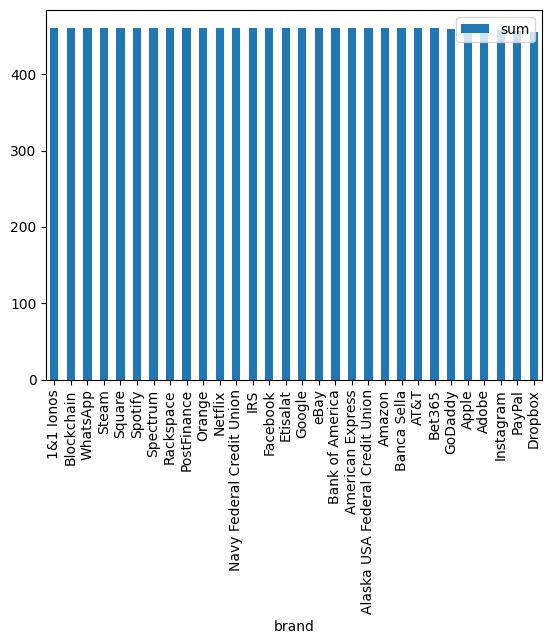

In [20]:
bp = brands_phish.reset_index()
bp.columns = ["brand", "sum"]
bp.to_csv(r'brands.csv', index=False)
bp.iloc[:30].plot.bar(x="brand", y="sum")

In [24]:
bp_diff = pd.merge(bp, brands_not_correct, how="inner", left_on="brand", right_on="true_brand")
bp_diff.columns = ["brand", "sum", "not_detected"]
bp_diff["perc"] = 1 - (bp_diff["not_detected"]/bp_diff["sum"])
bp_diff

,brand,sum,not_detected,perc
0,1&1 Ionos,461,412,0.106291
1,Blockchain,461,461,0.000000
2,WhatsApp,461,446,0.032538
3,Steam,461,433,0.060738
4,Square,461,461,0.000000
5,Spotify,461,429,0.069414
6,Spectrum,461,461,0.000000
7,Rackspace,461,200,0.566161
8,PostFinance,461,447,0.030369
9,Orange,461,344,0.253796


<AxesSubplot: xlabel='brand'>

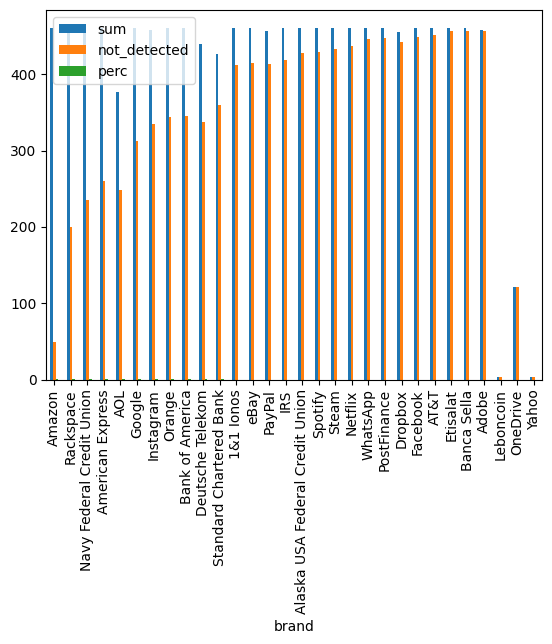

In [27]:
bp_diff.sort_values(by=['perc'], ascending=False).to_csv(r'brands_detected.csv', index=False)
bp_diff.sort_values(by=['perc'], ascending=False).iloc[:30].plot.bar(x="brand")